In [4]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd

In [6]:
url = 'tested.csv'
data = pd.read_csv(url)

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# drop embarked
data.drop('Cabin', axis=1, inplace=True)

In [9]:
# drop na
data.dropna(inplace=True)

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [12]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# STANDARDISATION/FEATURE SCALING (PRE PROCESSING)

In [14]:
# Standardize
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(x_train)
x_train_transformed = scalar.transform(x_train)
x_test_transformed = scalar.transform(x_test)

In [15]:
!pip install prettytable

Defaulting to user installation because normal site-packages is not writeable


# CROSS VALIDATION
Divides into 10 folds.
First loop-Tell classifier to train on first 9 folds and take 10th fold to test.
Second loop-10th fold will be trained and one of the folds in the 9 training fold will be be the training data.
In order to test every fold, multiples loops are used.
For a single kernel ,we use different values of c. (Look at table below)
Types of kernel used-
1)linear
2)poly(non linear)
3)rbf
4)sigmoid

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from prettytable import PrettyTable
import numpy as np

In [17]:
# Cross validation for hyper-parameter tuning
hyperparameter_score_list = []
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for c in np.arange(0.5,3,0.5):  # used to change value of c for every type of kernel
        svm = SVC(kernel=kernel, C=c)
        scores = cross_validate(svm, x_train_transformed, y_train, cv=10, scoring='accuracy') # cv is the folds.There are 10 folds here. We can change the number of folds as we wish.
        mean_score = np.mean(scores['test_score'])
        hyperparameter_score_list.append([kernel, c, mean_score])
# Choose the hyper-parameters (with highest average accuracy)
myTable = PrettyTable(["Kernel", "C", "Avg accuracy"])
for row in hyperparameter_score_list:
    myTable.add_row([row[0], row[1], round(row[2],3)])
print(myTable)

+---------+-----+--------------+
|  Kernel |  C  | Avg accuracy |
+---------+-----+--------------+
|  linear | 0.5 |     1.0      |
|  linear | 1.0 |     1.0      |
|  linear | 1.5 |     1.0      |
|  linear | 2.0 |     1.0      |
|  linear | 2.5 |     1.0      |
|   poly  | 0.5 |     1.0      |
|   poly  | 1.0 |     1.0      |
|   poly  | 1.5 |     1.0      |
|   poly  | 2.0 |     1.0      |
|   poly  | 2.5 |     1.0      |
|   rbf   | 0.5 |    0.989     |
|   rbf   | 1.0 |    0.996     |
|   rbf   | 1.5 |    0.996     |
|   rbf   | 2.0 |    0.996     |
|   rbf   | 2.5 |    0.996     |
| sigmoid | 0.5 |    0.985     |
| sigmoid | 1.0 |    0.981     |
| sigmoid | 1.5 |    0.981     |
| sigmoid | 2.0 |    0.988     |
| sigmoid | 2.5 |    0.981     |
+---------+-----+--------------+


In [18]:
import matplotlib.pyplot as plt

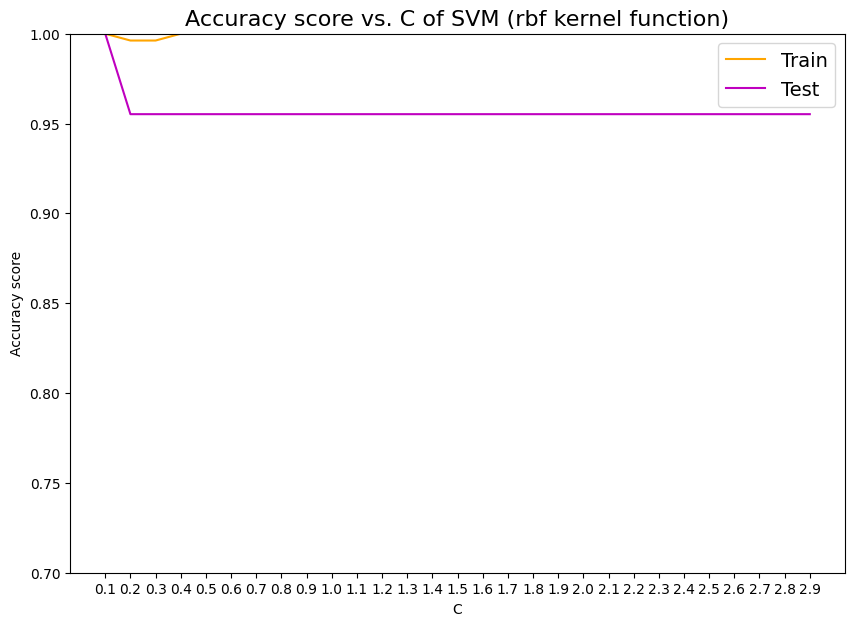

In [19]:
# Try different C
c_range = np.arange(0.1, 3, 0.1)
test_svm = []
train_svm = []
for c in c_range:
    svm_classifier = SVC(kernel='rbf', C=c)
    svm_classifier.fit(x_train_transformed, y_train)
    train_svm.append(svm_classifier.score(x_train_transformed, y_train))
    test_svm.append(svm_classifier.score(x_test_transformed, y_test))
# Line plot of training/testing score
fig = plt.figure(figsize=(10, 7))
plt.plot(c_range, train_svm, c='orange', label='Train')
plt.plot(c_range, test_svm, c='m', label='Test')
plt.xlabel('C')
plt.xticks(c_range)
plt.ylabel('Accuracy score')
plt.ylim(0.7, 1)
plt.legend(prop={'size': 14}, loc=1)
plt.title('Accuracy score vs. C of SVM (rbf kernel function)', size=16)
plt.show()


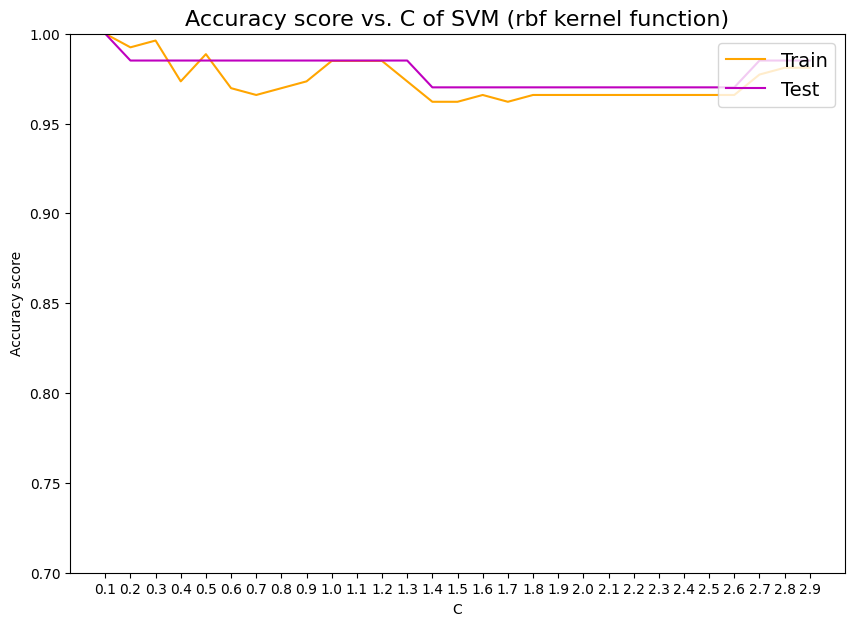

In [20]:
# Try different C
c_range = np.arange(0.1, 3, 0.1)
test_svm = []
train_svm = []
for c in c_range:
    svm_classifier = SVC(kernel='sigmoid', C=c)
    svm_classifier.fit(x_train_transformed, y_train)
    train_svm.append(svm_classifier.score(x_train_transformed, y_train))
    test_svm.append(svm_classifier.score(x_test_transformed, y_test))
# Line plot of training/testing score
fig = plt.figure(figsize=(10, 7))
plt.plot(c_range, train_svm, c='orange', label='Train')
plt.plot(c_range, test_svm, c='m', label='Test')
plt.xlabel('C')
plt.xticks(c_range)
plt.ylabel('Accuracy score')
plt.ylim(0.7, 1)
plt.legend(prop={'size': 14}, loc=1)
plt.title('Accuracy score vs. C of SVM (rbf kernel function)', size=16)
plt.show()


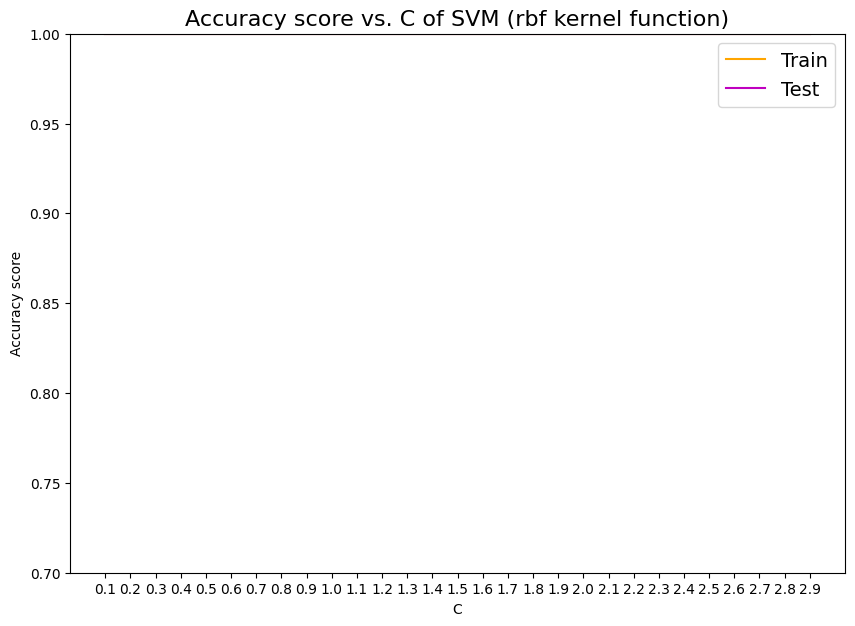

In [23]:
# Try different C
c_range = np.arange(0.1, 3, 0.1)
test_svm = []
train_svm = []
for c in c_range:
    svm_classifier = SVC(kernel='linear', C=c)
    svm_classifier.fit(x_train_transformed, y_train)
    train_svm.append(svm_classifier.score(x_train_transformed, y_train))
    test_svm.append(svm_classifier.score(x_test_transformed, y_test))
# Line plot of training/testing score
fig = plt.figure(figsize=(10, 7))
plt.plot(c_range, train_svm, c='orange', label='Train')
plt.plot(c_range, test_svm, c='m', label='Test')
plt.xlabel('C')
plt.xticks(c_range)
plt.ylabel('Accuracy score')
plt.ylim(0.7, 1)
plt.legend(prop={'size': 14}, loc=1)
plt.title('Accuracy score vs. C of SVM (rbf kernel function)', size=16)
plt.show()

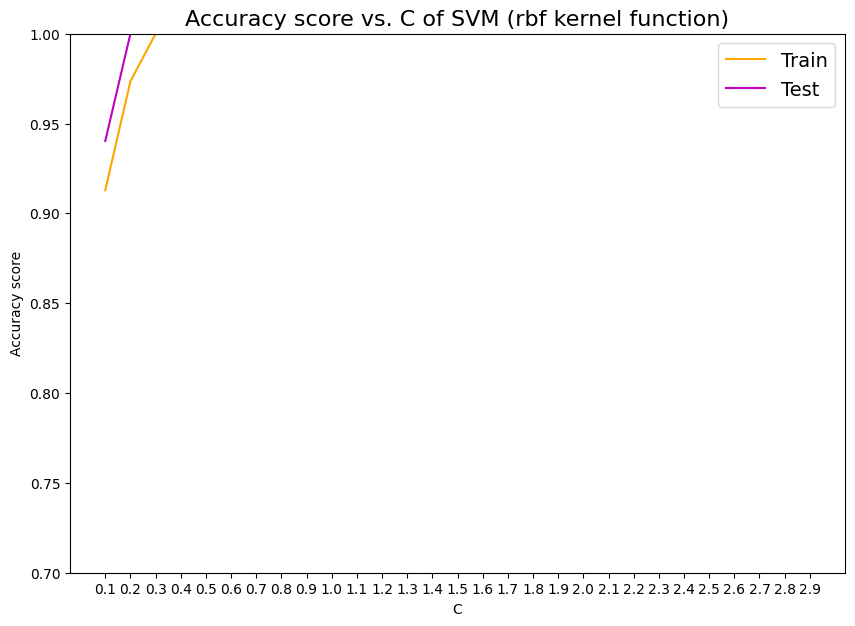

In [24]:
# Try different C
c_range = np.arange(0.1, 3, 0.1)
test_svm = []
train_svm = []
for c in c_range:
    svm_classifier = SVC(kernel='poly', C=c)
    svm_classifier.fit(x_train_transformed, y_train)
    train_svm.append(svm_classifier.score(x_train_transformed, y_train))
    test_svm.append(svm_classifier.score(x_test_transformed, y_test))
# Line plot of training/testing score
fig = plt.figure(figsize=(10, 7))
plt.plot(c_range, train_svm, c='orange', label='Train')
plt.plot(c_range, test_svm, c='m', label='Test')
plt.xlabel('C')
plt.xticks(c_range)
plt.ylabel('Accuracy score')
plt.ylim(0.7, 1)
plt.legend(prop={'size': 14}, loc=1)
plt.title('Accuracy score vs. C of SVM (rbf kernel function)', size=16)
plt.show()
